In [97]:
import iris 
import matplotlib.pyplot as plt
import iris.coord_categorisation
import numpy as np
import cartopy as cart
import os
import pandas as pd
import cartopy as cart
import glob
from matplotlib import gridspec

In [99]:
#--------------------------------------------------------------------------
# LOAD DATAFRAMES
#--------------------------------------------------------------------------

os.chdir('C:\\Users\\fb428\\OneDrive - University of Exeter\\Documents\\PhD\\papers\\manuscript3\\figures_and_data\\figure_making\\output_files\\')

site_info = pd.read_csv('station_info.csv')

site = pd.read_csv('annual_mean_site.csv')
UKESM = pd.read_csv('annual_mean_UKESM.csv')


#-------------tidy dataframes--------------------------------------------

site.rename(columns={'climatology':'mean_site', 'std':'std_site', 'std_monthly':'std_month_site'}, inplace=True)
UKESM.rename(columns={'Ozone_avg':'mean_UKESM', 'std':'std_UKESM', 'std_monthly':'std_month_UKESM'}, inplace=True)


In [100]:
#--------------------------------------------------------------------------
# MERGE ALL SITES AND ADD NAMES
#--------------------------------------------------------------------------


locs = site_info[['item', 'name']].drop_duplicates()

site_names = pd.merge(site, locs, on=['item'])
UKESM_names = pd.merge(UKESM, locs, on=['item'])

full_data = pd.merge(site_names, UKESM_names, on=['item', 'UKESM_Lat', 'UKESM_Lon', 'index_Lat', 'index_Lon', 'start_yr',
       'end_yr', 'name'])

n = len(site_names)

#-------------tidy dataframes--------------------------------------------

full_data.drop(columns={'Unnamed: 0_x','Unnamed: 0_y', 'start_yr', 'end_yr'}, inplace=True)

full_data.columns

Index(['Unnamed: 0.1_x', 'item', 'mean_site', 'std_month_site', 'std_site',
       'UKESM_Lat', 'UKESM_Lon', 'index_Lat', 'index_Lon', 'name',
       'Unnamed: 0.1_y', 'mean_UKESM', 'std_UKESM'],
      dtype='object')

In [101]:
#--------------------------------------------------------------------------
# MEAN BY NAME
#--------------------------------------------------------------------------

full_mean = full_data.groupby(['name']).mean().reset_index()

full_mean['bias'] = full_mean['mean_site'] -  full_mean['mean_UKESM']


In [102]:
chosen_data = full_mean[(full_mean['name'] != 'Mt. Kenya') & (full_mean['name'] != 'Tanah Rata')]
m = len(chosen_data)

In [103]:
chosen_data['fig_order'] = [2,9,5,4,7,13,12,8,1,10,3,11,6]

In [104]:
chosen_data.sort_values(by='fig_order', inplace=True)

In [105]:
chosen_data

,name,Unnamed: 0.1_x,item,mean_site,std_month_site,std_site,UKESM_Lat,UKESM_Lon,index_Lat,index_Lon,Unnamed: 0.1_y,mean_UKESM,std_UKESM,bias,fig_order
8,Porto Velho,16.0,19.0,4.818357,3.594661,NaN,-8.125000,295.3125,65.000000,157.000000,12.0,21.762230,3.226871,-16.943873,1
0,Amazonas,14.5,17.5,8.557652,3.569082,2.839389,-3.125000,300.0000,69.000000,159.500000,13.5,22.163887,0.908347,-13.606234,2
10,Santarem,17.0,20.0,15.497373,4.482816,NaN,-3.125000,304.6875,69.000000,162.000000,11.0,24.392963,1.328559,-8.895590,3
3,Congo,11.0,14.0,15.580539,1.767307,1.828311,0.625000,23.4375,72.000000,12.000000,15.0,26.632544,1.638012,-11.052005,4
2,Bukit Koto,4.0,4.0,12.971228,1.371138,2.135940,-0.625000,100.3125,71.000000,53.000000,4.0,37.717854,5.016323,-24.746626,5
12,Watukosek,6.0,8.0,14.311824,1.362540,4.429588,-8.125000,113.4375,65.000000,60.000000,6.0,41.726353,2.932183,-27.414529,6
4,Daintree,12.0,15.0,19.187853,6.944581,NaN,-15.625000,145.3125,59.000000,77.000000,16.0,29.578197,0.445648,-10.390344,7
7,Panama,13.0,16.0,18.677174,2.216513,NaN,9.375000,280.3125,79.000000,149.000000,18.0,39.740696,0.788260,-21.063522,8
1,Bogota,1.0,1.0,13.198888,2.154427,1.820514,5.625000,284.6875,76.000000,151.333333,1.0,25.687235,0.797644,-12.488347,9
9,San Lorenzo,7.0,10.0,17.815168,3.984232,1.246945,-25.625000,302.8125,51.000000,161.000000,7.0,27.703999,1.881586,-9.888831,10


In [106]:
chosen_data.iloc[-3,0] = r'S$\tilde\mathrm{a}$o Paulo'
chosen_data.iloc[8,0] = r'Bogot$\acute\mathrm{a}$'

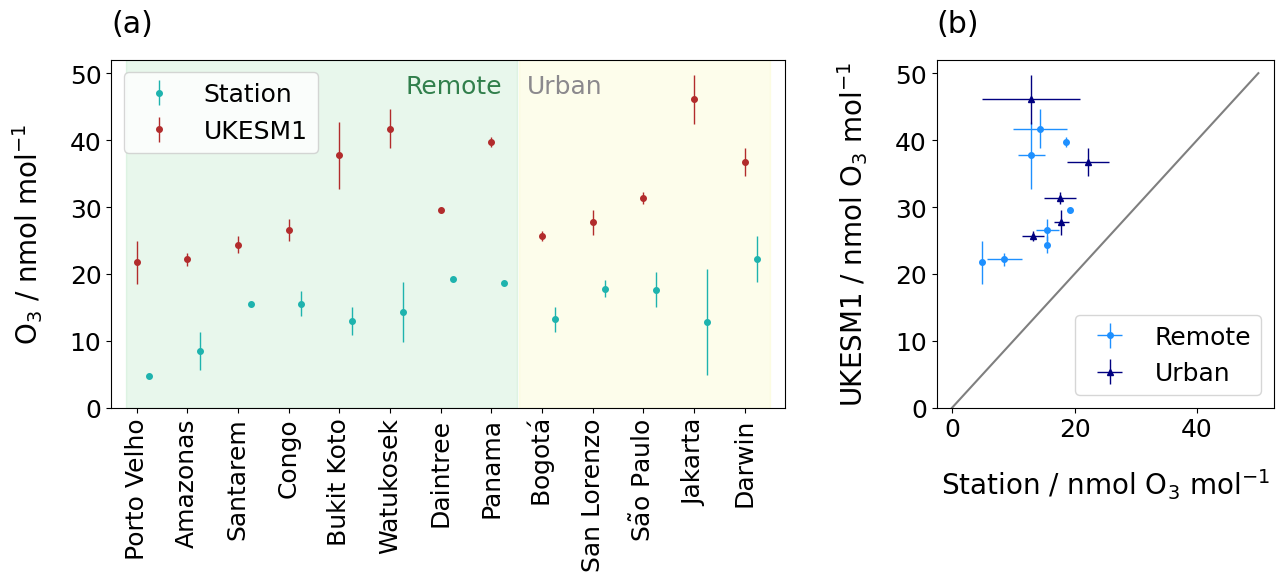

In [107]:
plt.figure(figsize=(15,6))

gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1]) 

plt.rcParams['font.size']=18

plt.subplot(gs[0])
plt.errorbar(np.linspace(0.25,m-1+0.25,m), chosen_data['mean_site'].values, yerr=chosen_data['std_site'].values,
                 elinewidth = 1,  marker =  'o', markersize = 4, linestyle = '', color=[0.1157, 0.7022, 0.6843], label='Station')
        
plt.errorbar(range(m), chosen_data['mean_UKESM'].values, yerr=chosen_data['std_UKESM'].values,
                 elinewidth = 1,  marker =  'o', markersize = 4, linestyle = '', color=[0.6980, 0.1725, 0.1725], label='UKESM1')

plt.ylabel('O$_3$ / nmol mol$^{-1}$', labelpad = 18, fontsize=20)
plt.xticks(range(m), chosen_data['name'].values, rotation=90)
plt.legend()
plt.xlim(-0.5,12.8)
plt.ylim(0,52)

plt.title('(a)', loc='left', pad = 20)

plt.subplots_adjust(bottom=0.3)

plt.fill_between([-0.2,7.5],[60,60], color=[ 0.141, 0.69647, 0.2980], alpha = 0.1)
plt.fill_between([7.55,12.5],[60,60], color=[ 0.9451, 0.9373, 0.2510], alpha = 0.1)

plt.text(7.7,47,'Urban', color=[ 0.5451, 0.5373, 0.5510], fontsize=18)
plt.text(5.3,47,'Remote', color=[ 0.1941, 0.49647, 0.2980 ], fontsize=18)

plt.subplot(gs[1])

plt.errorbar(chosen_data['mean_site'].values[0:8], chosen_data['mean_UKESM'].values[0:8], 
                 xerr=chosen_data['std_site'].values[0:8], yerr=chosen_data['std_UKESM'].values[0:8],
                 elinewidth = 1,  marker =  'o', markersize = 4, color='dodgerblue', linestyle = '', label = 'Remote')
    
plt.errorbar(chosen_data['mean_site'].values[8:13], chosen_data['mean_UKESM'].values[8:13],
                 xerr=chosen_data['std_site'].values[8:13], yerr=chosen_data['std_UKESM'].values[8:13],
                 elinewidth = 1,  marker =  '^', markersize = 5, color='navy', linestyle = '', label = 'Urban')

plt.xlabel('Station / nmol O$_3$ mol$^{-1}$', labelpad = 18, fontsize=20)
plt.ylabel('UKESM1 / nmol O$_3$ mol$^{-1}$', labelpad = 18, fontsize=20)
plt.legend()

plt.plot([0,50], [0,50], 'k', alpha = 0.5)
plt.ylim(0,52)

plt.title('(b)', loc='left', pad = 20)

plt.subplots_adjust(wspace=0.3)

plt.savefig('figures/annual_mean.png', dpi=400)

In [75]:
colors = ['darkred', 'tomato', 'red', 'dodgerblue', 'darkorchid','slateblue', 'olivedrab', 'fuchsia', 'peru', 'saddlebrown', 'darkorange','navy', 'yellowgreen']

C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\matplotlib\axes\_axes.py:1148: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\matplotlib\axes\_axes.py:1149: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


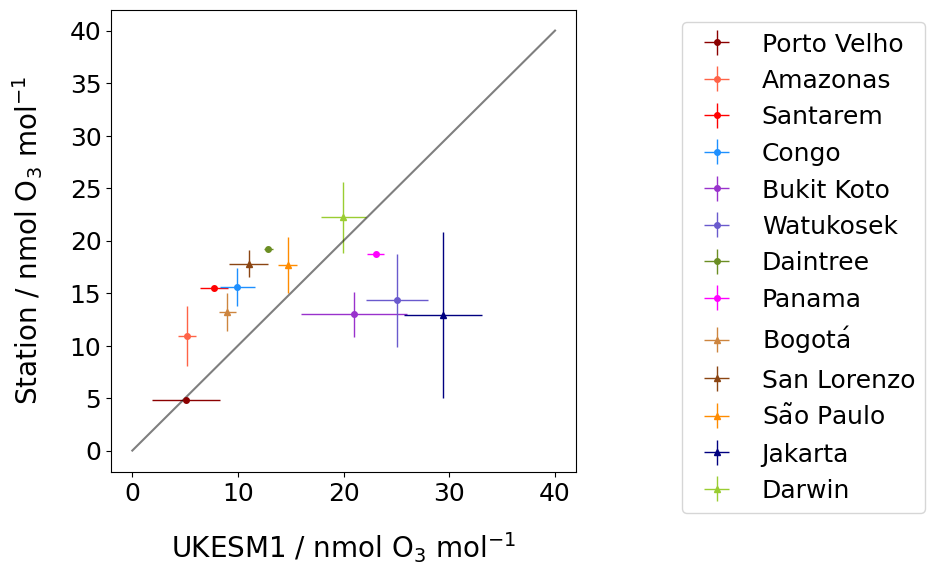

In [76]:
plt.figure(figsize=(6,6))

plt.rcParams['font.size']=18

for i in range(8):

    plt.errorbar(chosen_data['mean_UKESM'].values[i]-16.7,  chosen_data['mean_site'].values[i],
                 yerr=chosen_data['std_site'].values[i], xerr=chosen_data['std_UKESM'].values[i],
                 elinewidth = 1,  marker =  'o', markersize = 4, color=colors[i], linestyle = '', label = chosen_data['name'].values[i])
    
for i in range(8,13):

    plt.errorbar(chosen_data['mean_UKESM'].values[i]-16.7,  chosen_data['mean_site'].values[i],
                 yerr=chosen_data['std_site'].values[i], xerr=chosen_data['std_UKESM'].values[i],
                 elinewidth = 1,  marker =  '^', markersize = 5, color=colors[i], linestyle = '', label = chosen_data['name'].values[i])

    
m, c = np.polyfit(chosen_data['mean_UKESM'].values,  chosen_data['mean_site'].values, 1)


plt.ylabel('Station / nmol O$_3$ mol$^{-1}$', labelpad = 18, fontsize=20)
plt.xlabel('UKESM1 / nmol O$_3$ mol$^{-1}$', labelpad = 18, fontsize=20)
plt.legend(bbox_to_anchor = [1.2,1])

plt.plot([0,40], [0,40], 'k', alpha = 0.5)
#plt.plot([0,55], [0,55*m+c], 'k--', alpha = 0.5)
#plt.plot([0,55], [0,55*0.5], 'k--', alpha = 0.5)


#plt.savefig('annual_mean_corr.png', dpi=300, bbox_inches='tight')

## Metrics

In [77]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse(chosen_data['mean_UKESM'].values, chosen_data['mean_site'].values)

18.1422229664797

In [78]:
urban = chosen_data.iloc[8::]
rural = chosen_data.iloc[0:8]

In [79]:
SEAS = chosen_data.iloc[[4,5,11],:]
AF = chosen_data.iloc[3,:]
AUS =  chosen_data.iloc[[6,12],:]
PAN = chosen_data.iloc[7,:]
SAM = chosen_data.iloc[[0,1,2,8,9,10],:]

rest = chosen_data.iloc[[0,1,2,3,6,7,8,9,10,12],:]

In [80]:
np.polyfit(rest['mean_site'].values, rest['mean_UKESM'].values, 1)

array([ 0.9475444 , 13.80275135])

In [81]:
total_bias = np.mean(chosen_data['mean_site'].values - chosen_data['mean_UKESM'].values)
total_bias

-16.557463674641028

In [82]:
np.mean(chosen_data['mean_site'].values)

15.057057043307692

In [83]:
rel_bias = total_bias / np.mean(chosen_data['mean_site'].values) 
rel_bias

-1.0996480671500286

In [84]:
max_bias = np.min(chosen_data['mean_site'].values - chosen_data['mean_UKESM'].values)
max_bias_rest = np.min(rest['mean_site'].values - rest['mean_UKESM'].values)
min_bias = np.max(chosen_data['mean_site'].values - chosen_data['mean_UKESM'].values)

print('min: ', min_bias)
print('max: ', max_bias)
print('max rest: ', max_bias_rest)

min:  -8.895589690000001
max:  -33.219084390000006
max rest:  -21.06352184


In [85]:
SEAS_bias = np.mean(SEAS['mean_site'].values - SEAS['mean_UKESM'].values)
print('SEAS bias: ', SEAS_bias)   

AF_bias = np.mean(AF['mean_site'] - AF['mean_UKESM'])
print('AF bias: ', AF_bias)

AUS_bias = np.mean(AUS['mean_site'].values - AUS['mean_UKESM'].values)
print('AUS bias: ', AUS_bias)

SAM_bias = np.mean(SAM['mean_site'].values - SAM['mean_UKESM'].values)
print('SAM bias: ', SAM_bias) 

PAN_bias = np.mean(PAN['mean_site'] - PAN['mean_UKESM'])
print('PAN bias: ', PAN_bias) 

rest_bias = np.mean(rest['mean_site'].values - rest['mean_UKESM'].values)
print('rest bias: ', rest_bias) 

SEAS bias:  -28.460079633333336
AF bias:  -11.052005269999999
AUS bias:  -12.42732905
SAM bias:  -12.14943394338889
PAN bias:  -21.06352184
rest bias:  -12.986678887033335


In [86]:
print('SEAS bias: ', SEAS_bias/np.mean(SEAS['mean_site'].values))   

print('AF bias: ', AF_bias/np.mean(AF['mean_site'] ))

print('AUS bias: ', AUS_bias/np.mean(AUS['mean_site'].values))

print('SAM bias: ', SAM_bias/np.mean(SAM['mean_site'].values)) 

print('PAN bias: ', PAN_bias/np.mean(PAN['mean_site'] )) 

print('rest bias: ', rest_bias/np.mean(rest['mean_site'].values)) 

SEAS bias:  -2.1255890679064335
AF bias:  -0.7093467986905738
AUS bias:  -0.6002928435662742
SAM bias:  -0.912210913071389
PAN bias:  -1.1277681334208858
rest bias:  -0.8347592693470371


In [87]:
from scipy import stats

In [88]:
r_sq = stats.pearsonr(rest['mean_site'].values, rest['mean_UKESM'].values)
print('r2: ', r_sq[0]**2)
print('p: ', r_sq[1])

r_sq_all = stats.pearsonr(chosen_data['mean_site'].values, chosen_data['mean_UKESM'].values)
print('r2 all: ', r_sq_all[0]**2)
print('p all: ', r_sq_all[1])

r2:  0.6131116658104253
p:  0.007394358887972144
r2 all:  0.11179174912245898
p all:  0.26417371981649485


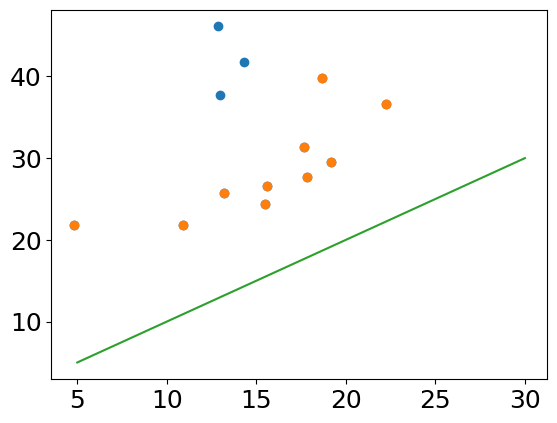

In [89]:
plt.plot(chosen_data['mean_site'].values, chosen_data['mean_UKESM'].values, 'o')
plt.plot(rest['mean_site'].values, rest['mean_UKESM'].values, 'o')
plt.plot([5,30], [5,30])

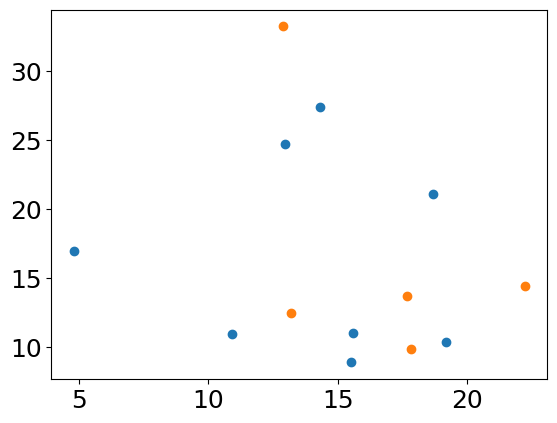

In [90]:
plt.plot(rural['mean_site'].values, -rural['bias'].values, 'o')
plt.plot(urban['mean_site'].values, -urban['bias'].values, 'o')
#plt.plot([5,30], [5,30])

In [91]:
stats.ttest_ind(rest['bias'].values, SEAS['bias'].values)

Ttest_indResult(statistic=6.11837463069024, pvalue=7.537904805663381e-05)

In [92]:
stats.ttest_ind(rural['bias'].values, urban['bias'])

Ttest_indResult(statistic=0.0707177986383867, pvalue=0.944891672066819)